# Анализ успешности игры
Нам доступны данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Нам нужно определить популярные игры для рекламной компании магазина.

**Цель исследования** 

Необходимо провести предварительный анализ полученных данных и проверить гипотезы, чтобы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

Входные данные — архив доступный из открытых источников. О качестве данных ничего не известно. Поэтому перед нашим исследованием понадобится обзор данных. Необходимо проверить данные на ошибки и оценить их влияние. Затем, на этапе предобработки нужно поискать возможность исправить самые критичные ошибки и подготовить данные к анализу. Кроме исследовательского анализа необходимо проверить закономерности внутри каждого региона пользователей.


Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследование данных.
 4. Портрет пользователя региона.
 5. Проверка гипотез.

## Обзор данных

### Открытие файлов. Общее предоставление

Импортируем библиотеки для работы в Питоне.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

Откроем файл с данными и изучим общую информацию. Прочитаем файл games.csv и сохраним его в датасете `games`:

In [ ]:
try:
    games = pd.read_csv('/content/drive/MyDrive/Yury/all/games.csv') 
except: 
    games = pd.read_csv('games.csv')

games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных.**

Согласно документации к данным:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В предоставленном файле архив для 16715 игр. Название колонок содержат прописные буквы. Год выпуска указан типом данных `float`, а для оценки пользователей использован `object`.

Имеются пропуски в некоторых столбцах. Найдем их долю для каждой колонки.

In [ ]:
# share of 'NaN'

games.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Найдем количество явных дубликатов - `duplicated().sum()`.

In [ ]:
print('Количество явных дубликатов:', games.duplicated().sum())

Количество явных дубликатов: 0


### Вывод

Мы получили данные в виде таблицы из 16715 строк и 11 столбцов. Явных дубликатов не выявлено. В данных были обнаружены проблемы, некоторые из них необходимо решить, чтобы привести информацию в форму более удобную для анализа:
- прописные буквы в названии столбцов;
- тип данных в столбцах год и оценка указан некорректно;
- имеются пропуски в 6 столбцах.

Возможно пропуски появились при переносе данных. Выполним преобразование данных в следующем разделе.

## Предобработка данных

### Названия столбцов

Приведем название столбцов к нижнему регистру.

In [ ]:
# update columns name to lowercase

games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Исправление прошло корректно.

### Пропущенные значения

Заполнить пропуски в столбцах `'name', 'genre', 'year_of_release'` каким-либо методом не представляется возможным. Пропуски этих значений составляют менее 1%. Удалим такие строки и запишем результат в `games_upd`.

In [ ]:
# remove strings with NaN

games_upd = games.dropna(subset = ['name', 'genre', 'year_of_release'])

Выполним срез для строк с NaN в столбцах `'critic_score', 'user_score', 'rating'` в новый датасет. Рассмотрим объемы продаж для этих данных, изучим распределение значений в столбцах методом `describe()`. 

In [ ]:
# query data with NaN to new datset
nan = games_upd.query('(critic_score!=critic_score) or (rating!=rating) or (user_score!=user_score)')

# describe of sales values
nan[['na_sales','eu_sales','jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,8566.000000,8566.000000,8566.000000,8566.000000
mean,0.177686,0.085900,0.098979,0.023604
std,0.716408,0.322397,0.344227,0.088759
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.020000,0.000000,0.000000,0.000000
75%,0.140000,0.050000,0.060000,0.020000
max,29.080000,10.950000,10.220000,2.740000


In [ ]:
# share of games sales with more than 1 million copies

len(nan.query('na_sales>1'))/len(nan)

0.03537240252159701

Продажи минимальны для игр без оценок или без рейтинга ESRB. 75% всех значений по продажам не превышают 0.14 млн. копий, а медианные значения, вообще, равны нулю или не больше 0.02 млн. копий. Такие игры не очень популярны, поэтому большинство пользователей и критиков может просто о них не знать. Рейтинг ESRB более актуален для Сев. Америки, непопулярные игры могли и не выходить на продажу в штатах. Также имеется небольшое число игр, которые довольно популярные с числом продаж более 1 млн. копий, например, в Сев. Америке доля таких игр составляет 3.5%. Вряд ли такие игры могут быть без оценки или рейтинга ESRB. Вероятно, что для популярных игр ошибки могли появится из-за технической проблемы при переносе данных.

Логически заполнить пропуски в оценке или рейтингах невозможно, т.к. каждая игра - это уникальный продукт, независимый от других игр или категорий. Доля этих значений от 40% до 50%, что очень существенно при оценке информации в исследовании. В нашем случае, внесение изменений в колонки с рейтингом могут привести к неадекватным результатам в блоке статистического анализа (ниже по проекту), так как статистические тесты очень чувствительны к каким-либо масштабным манипуляциям с данными. Какие-либо изменения в данных приведут к серьезным искажениям. Пропущенные значения здесь придется оставить. 

### Тип данных

Обратим внимание на столбец `user_score`. Выведем все варианты значений. Применим метод `unique()`, который проверит все вариации значений для колонки.

In [ ]:
games_upd['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы обнаружили запись "tbd" вместо оценки. Это аббревиатура на английском "to be determined", что значит в переводе "подлежит определению". Рейтинг для таких игр еще не определен, будет логично оставить пропуск вместо "tbd".

In [ ]:
# replace 'tbd' to NaN

games_upd['user_score'].replace('tbd', np.nan, inplace=True)

Переведм тип данных для столбца `user_score` в `float`, а `year_of_release` в `integer`.

In [ ]:
# transfer type of columns

games_upd = games_upd.astype({
    'user_score': 'float',
    'year_of_release': 'int'})

### Суммарные продажи

Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
# sum sales calculation
games_upd['sum_sales'] = games_upd['na_sales'] + games_upd['eu_sales'] + games_upd['jp_sales'] + games_upd['other_sales']

games_upd.head() # top 5 strings

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Проверим, как информация изменилась в таблице.

In [ ]:
games_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Преобразования типов данных прошли корректно.

### Вывод

На этапе предобработки были исправлены ошибки, выявленные раннее. Общие данные были приведены в форму более удобную для анализа:
- Названия столбцов записаны с помощью нижнего регистра.
- Удалили пропуски в столбцах `'name', 'genre', 'year_of_release'`. Исходные данные сократились на 1%.
- Тип данных для колонок `'user_score' и 'year_of_release'` скорректирован.
- Был добавлен столбец с указанием суммарных продаж во всех регионах.

Ошибки в данных скорее всего появились по техническим причинам при переносе данных. Пропуски в столбцах `'critic_score', 'user_score', 'rating'` возможно связаны с низкой популярностью некоторых игр.

## Исследование данных

### Год выпуска

Посмотрим, сколько игр выпускалось в разные годы.

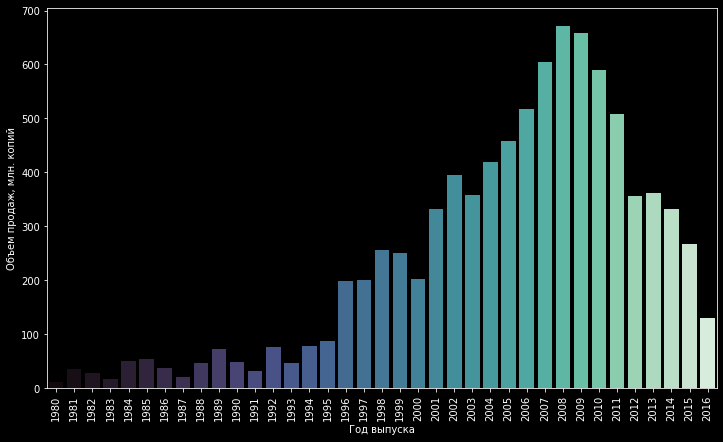

In [ ]:
# dark theme for plot
plt.style.use('dark_background')

plt.figure(figsize=(12,7))

# plot of grouped games with sum_sales for year_of_release
games_year_group = games_upd.groupby('year_of_release')['sum_sales'].sum()
sns.barplot(x=games_year_group.index, y=games_year_group.values, palette='mako')

plt.xticks(rotation = 90)
plt.ylabel('Объем продаж, млн. копий')
plt.xlabel('Год выпуска');

Выпуск игр имеет волнообразный характер. На графике можно отследить, как эта индустрия развивалась на мировой арене. Выделим основные временные периоды по объему выпуска игр. Добавим характерное описание к полученным этапам, основываясь на данных из открытых источников.
- 1980-1995. Начальный этап. Выпуск игр колеблется, не превышая 100 млн. копий в год. Домашние компьютеры и игровые платформы начинают набирать популярность. Появляется множество компаний, занимающихся исключительно разработкой игр. 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица и стратегия в реальном времени.
- 1996-2000. Расцвет видеоигр. Выпуск игр колеблется, не превышая 250 млн. копий в год. Развитие компьютерных технологий стимулирует разработку игр нового поколения. В 1996 году на свет появилась Voodoo I – первая видео карта с поддержкой 3D-графики. В этот период были выпущены игры Duke Nukem 3D и Quake – первые полностью трехмерные игры. Игры становятся всё более атмосферными, и сюжет играет уже далеко не последнюю роль. Появляются художественные фильмы, основанные на сюжете видеоигр.
- 2001-2008. Пик популярности. Выпуск игр плавно растет, достигая 660 млн. копий в год. Игровая индустрия продолжает двигаться вперед вместе с цифровыми технологиями: более мощные процессоры создают реалистичную детализированную графику. В мире консолей на рынок выходят легендарные Playstation от Sony, Xbox от Microsoft, а Nintendo выпускает Wii. Игровые тенденции также быстро распространяются по Интернету. Появляются онлайн-игры, в которых взаимодействуют десятки тысяч игроков.
- 2009-2016. Спад популярности. Выпуск игр планомерно снижается, достигая 120 млн. копий в год. Происходит перенасыщение рынка различными играми, рядовых покупателей уже тяжело удивить. Экономический кризис 2008 года значительно влияет на компании разработчиков, заставляя их экономить и сокращать бюджет. Также кризис снижает покупательскую способность пользователей. Рынок смартфонов и планшетов создает новый огромный субрынок для разработчиков игр. Бесплатные скачиваемые игры также становятся все более популярными, что отрицательно сказывается на выпуске видеоигр.

В исследовании не важны данные за все периоды, т.к. нас интересует актуальная ситуация на современном рынке. В том числе, определение популярных игровых платформ в наши дни.

### Игровые платформы

Рассмотрим платформы за период после 2000 года. Выберем число наиболее популярных, т.е. платформ с наибольшими суммарными продажами и запишем их в "словарь" `platform_top`.

In [ ]:
# query of games released after 2000
games_year = games_upd.query('year_of_release>=2000').copy()

# top of platforms with the largest volume of sales
platform_top = games_year.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(16)
platform_top

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
Name: sum_sales, dtype: float64

Сгруппируем суммарный объем продаж по годам для каждой из популярных платформ.

In [ ]:
# pivot_table for top pltaforms with sum_sales and year_of_release
platform_map = games_year.query('platform in @platform_top.index').pivot_table(
    index = 'year_of_release', columns = 'platform',values= 'sum_sales', aggfunc='sum')

platform_map.head()

platform,3DS,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2000,NaN,NaN,0.07,NaN,4.66,96.37,39.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,61.53,26.34,5.47,35.59,166.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.26,NaN
2002,NaN,NaN,74.16,51.81,8.57,6.67,205.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN
2003,NaN,NaN,56.67,50.61,8.84,2.07,184.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.04,NaN
2004,NaN,17.27,77.91,28.82,10.39,NaN,211.81,NaN,NaN,7.06,NaN,NaN,NaN,NaN,65.42,NaN


Сводная таблица напоминает матрицу с определенным заполнением ячеек. Пропущенные значения запишем нулем и сбросим индекс для корректного построения графика.

In [ ]:
# preparing for plot, fillna and reset index
platform_plot = platform_map.fillna(0)
platform_plot = platform_plot.reset_index()

platform_plot.head(5)

platform,year_of_release,3DS,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
0,2000,0.0,0.00,0.07,0.00,4.66,96.37,39.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.99,0.0
1,2001,0.0,0.00,61.53,26.34,5.47,35.59,166.43,0.0,0.0,0.00,0.0,0.0,0.0,0.0,22.26,0.0
2,2002,0.0,0.00,74.16,51.81,8.57,6.67,205.38,0.0,0.0,0.00,0.0,0.0,0.0,0.0,48.01,0.0
3,2003,0.0,0.00,56.67,50.61,8.84,2.07,184.31,0.0,0.0,0.00,0.0,0.0,0.0,0.0,55.04,0.0
4,2004,0.0,17.27,77.91,28.82,10.39,0.00,211.81,0.0,0.0,7.06,0.0,0.0,0.0,0.0,65.42,0.0


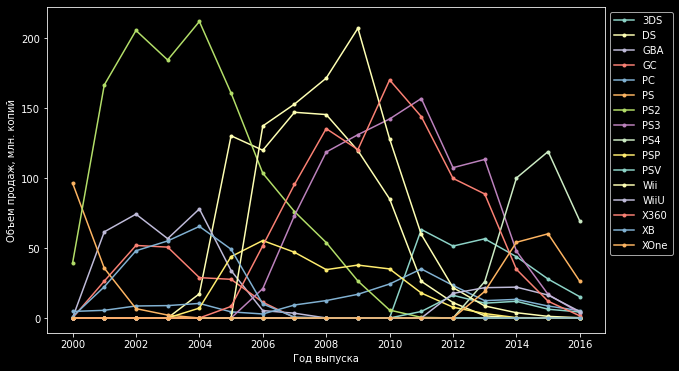

In [ ]:
# plot for platforms
ax = platform_plot.plot(x='year_of_release' ,style='.-', figsize=(10,6))

plt.ylabel('Объем продаж, млн. копий')
plt.xlabel('Год выпуска')

ax.legend(bbox_to_anchor=(1.0, 1.0));

Некоторые прямые сливаются на графике, сложно определить динамику продаж игр в рамках одной платформы. Построим для таблицы тепловую карту с помощью метода `heatmap` из библиотеки `seaborn`, чтобы получить более ясное представление для распределения суммарных продаж по годам.

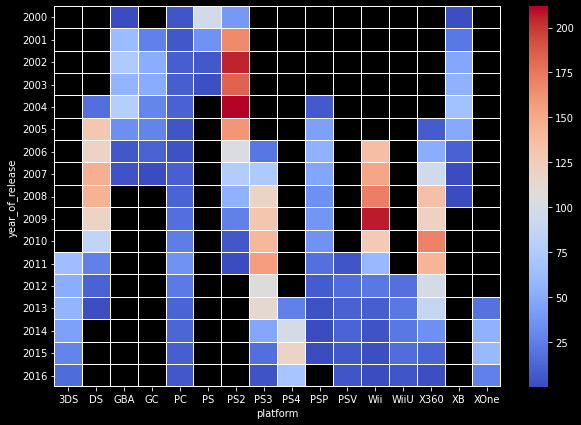

In [ ]:
# heatmap for top platforms with sum_sales

plt.figure(figsize=(10,7))
sns.heatmap(platform_map, linewidths=.01, cmap='coolwarm')
plt.show()

Полученная карта за период после 2000 года показывает, что платформы редко заходят на рынок с высокими продажами видеоигр для них, исключение только для Wii от Nintendo (видимо была проведена мощная рекламная компания перед запуском). Можно также определить закономерность, что платформы актуальны в среднем в течение 8-10 лет. После этого периода пользователи выбирают новые, только выпущенные платформы, которые вытесняют старые с рынка. Все игры для ПК собраны вместе без какой-либо градации. Домашний компьютер актуален всегда, его можно легко модернизировать, лишь приобрести современное "железо".

Определим, за какой характерный срок появляются новые и исчезают старые платформы. Сделаем выборку по годам выпуска игр, с указанием значений min и max. Посчитаем разницу `year_of_release` для каждой платформы из нашего списка. Результат запишем в новый столбец.

In [ ]:
# pivot_table for top platforms with min, max for year_of_release
platform_life = games_year.query('platform in @platform_top.index').pivot_table(
    index = 'platform',values= 'year_of_release', aggfunc=['min', 'max'])

# reset of multi index
platform_life.columns = ['_'.join(col).strip() for col in platform_life.columns.values]

# calculation of top platforms life
platform_life['life'] = platform_life['max_year_of_release'] - platform_life['min_year_of_release']
platform_life.head()

,min_year_of_release,max_year_of_release,life
platform,,,
3DS,2011,2016,5
DS,2004,2013,9
GBA,2000,2007,7
GC,2001,2007,6
PC,2000,2016,16


Найдем среднее значение жизни популярных платформ. Консоли возрастом меньше 6 лет, только появились на рынке, маловероятно, что они исчезнут в следующем году. Уберем из расчета значения для ПК и платформы младше 6 лет, которые искажают результат.

In [ ]:
platform_life.query('(life>6)&(platform!="PC")')['life'].mean()

9.625

Округлим результат в меньшую сторону, т.к. обновление современного рынка происходит несколько быстрее, чем в прошлые года. В общем случае, 9 лет - это характерный период, за который появляются новые и исчезают старые платформы.

### Актуальный период

По результатам исследования предыдущих вопросов определим актуальный период: с 2015 по 2016 гг. Основной фактор — информация за актуальный период поможет построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы. Тепловая карта показывает, что общие продажи у всех платформ снижаются к настоящему моменту: ячейки имеют более темный цвет в разбивке по платформам к 2015-2016 г. Необходимо делать анализ игр, именно за период в этом тренде. Ситуация на рынке не очень позитивная, спрос на игры падает. Правильный выбор потенциально прибыльной игры для рекламы особенно критичен.

Тепловая карта также показывает, что такие популярные консоли, как PS4, PSV, 3DS, Xone и WiiU считаются молодыми и возможно будут перспективными в будущем. Они на рынке 4-6 лет при средней длительности жизни платформ в 9 лет.

Отфильтруем общие данные, возьмем игры только для актуального периода.

In [ ]:
# query of games released after 2015 - actual period
games_actual = games_upd.query('year_of_release>=2015').copy()

print('Количество проданных игр за актуальный период -', games_actual.shape[0])

Количество проданных игр за актуальный период - 1108


### Потенциально прибыльные платформы

Рассмотрим платформы за период после 2015 года. Посмотрим какие платформы попали в выборку.

In [ ]:
games_actual['platform'].value_counts()

PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
PC      104
X360     48
WiiU     42
Wii       5
PSP       3
Name: platform, dtype: int64

Всего имеется 10 платформ. Для полноты сведений оставим их все.

Сгруппируем суммарный объем продаж по годам для каждой из платформ.

In [ ]:
# actual period. pivot_table for top pltaforms with sum_sales and year_of_release
platform_actual_top = games_actual.pivot_table(
    index = 'year_of_release', columns = 'platform',values= 'sum_sales', aggfunc='sum')

# reset multi index
platform_actual_top = platform_actual_top.reset_index()

In [ ]:
platform_actual_top

platform,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
1,2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Построем график динамики продаж за актуальный период для каждой из платформ.

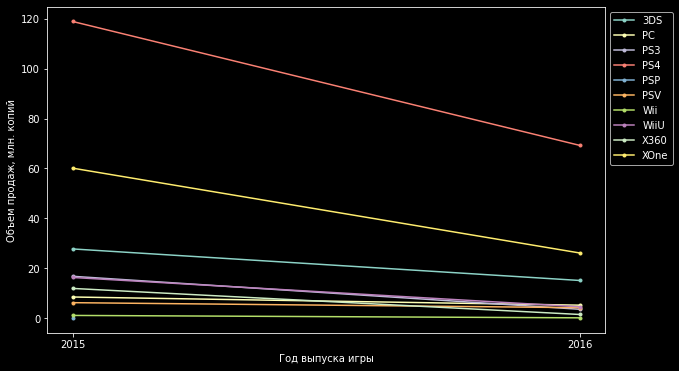

In [ ]:
# plot for top platforms with sum_sales
ax = platform_actual_top.plot(x='year_of_release',style='.-', figsize=(10,6))

plt.ylabel('Объем продаж, млн. копий')
plt.xlabel('Год выпуска игры')

plt.xticks(range(2015,2017))

ax.legend(bbox_to_anchor=(1.0, 1.0));

Тенденция продаж не очень позитивная за актуальный период. Пользователи, в общем случае, покупают игры с каждым годом все меньше. На фоне такого падения, можно выделить только тройку лучших по продажам за 2016 год - PS4, XOne и 3DS. Выберем эту тройку, как потенциально прибыльные платформы. Однако, отметим что данные за 2016 год неполные, возможно тогда произошли изменения.

### Глобальные продажи

Исследуем глобальные продажи игр в разбивке по потенциально прибыльным платформам. Выполним выборку игр, только для таких платформ в рамках актуального периода.

In [ ]:
# query of games for profitable platforms for actual period

platform_profit = games_actual.query('(platform=="PS4")|(platform=="XOne")|(platform=="3DS")')

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам.

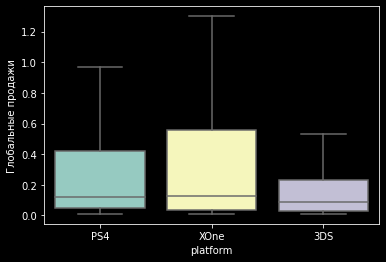

In [ ]:
# boxplot for profitable platforms and sum_sales
sns.boxplot(x="platform", y="sum_sales", data=platform_profit, showfliers=False);
plt.ylabel('Глобальные продажи');

Диаграмма показывает еще одну особенность для продаж у XOne за актуальный период. По размаху значений лидирует платформа XOne, чуть отстает PS4 и далеко от них 3DS:
- дисперсия и размах значений больше для XOne;
- медиана у двух лидеров одинаковая;
- медиана меньше среднего у всех платформ, что говорит о скошенности вправо для распределения значений.

Подробнее изучим распределение значений для лидеров PS4 и XOne методом `describe`.

In [ ]:
platform_profit.query('platform=="PS4"')['sum_sales'].describe()

count    301.000000
mean       0.625083
std        1.457063
min        0.010000
25%        0.050000
50%        0.120000
75%        0.420000
max       14.630000
Name: sum_sales, dtype: float64

In [ ]:
platform_profit.query('platform=="XOne"')['sum_sales'].describe()

count    167.000000
mean       0.516707
std        0.965940
min        0.010000
25%        0.035000
50%        0.130000
75%        0.555000
max        7.390000
Name: sum_sales, dtype: float64

Распределение значений также говорит в пользу XOne. Хотя медиана у платформ почти одинаковая, третий квартиль (75% значений) и размах значений у XOne больше. Эти показатели говорят о большом числе прибыльных игр для XOne, у PS4 таких игр меньше. Абсолютные значения по продажам более высокие у игр для PS4 за счет большого ассортимента, но распределение значений и диаграммы размаха указывает также на большую популярность консоли XOne у пользователей. Следует выбрать эту пару, как потенциально наиболее прибыльные платформы.

### Отзывы пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Отфильтруем общие данные, возьмем игры только для PS4, а также такие игры с оценками от критиков и пользователей.

In [ ]:
# query of games for PS4
ps4_total = games_actual.query('platform=="PS4"')

# query of games for PS4 with scores
ps4_score = ps4_total.query('(critic_score>0)|(user_score>0)')

# share of PS4
share_ps4 = len(ps4_total) / len(games_actual)
print(f'Доля игр для PS4 составляет {share_ps4:.0%}.')

# share of PS4 with scores
share_ps4_score = len(ps4_score) / len(ps4_total)
print(f'Доля игр для PS4 с рейтингом составляет {share_ps4_score:.0%}.')

Доля игр для PS4 составляет 27%.
Доля игр для PS4 с рейтингом составляет 64%.


Доля проданных игр для PS4 составляет 27% от всех платформ за актуальный период, из них только 64% имеют рейтинг. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами.

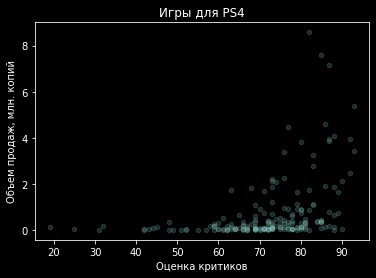

In [ ]:
# scatterplot for critic_score and sum_sales

ps4_score.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=.2)

plt.title('Игры для PS4')
plt.ylabel('Объем продаж, млн. копий')
plt.xlabel('Оценка критиков');

In [ ]:
# correlation coefficient

ps4_score['sum_sales'].corr(ps4_score['critic_score']) 

0.3928485555130601

Диаграмма иллюстрирует определенную зависимость объема продаж от отзывов критиков. В общем случае, с увеличением оценки увеличиваются продажи. Коэффициент корреляции также подтверждает наличии связи этих параметров. Пользователи в основном покупают игры с оценкой критиков больше 70.

Построим диаграмму рассеяния и посчитаем корреляцию между оценками пользователей и продажами.

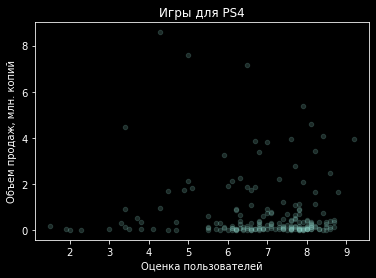

In [ ]:
# scatterplot for user_score and sum_sales

ps4_score.plot(x='user_score', y='sum_sales', kind='scatter', alpha=.2)

plt.title('Игры для PS4')
plt.ylabel('Объем продаж, млн. копий')
plt.xlabel('Оценка пользователей');

In [ ]:
# correlation coefficient

ps4_score['user_score'].corr(ps4_score['sum_sales']) 

-0.05973845712638215

Ни диаграмма, ни коэффициент корреляции не показывает какой-либо зависимости. Продажи, в общем случае, не зависят от оценки пользователей для платформы. Но большинство игр покупается с оценкой пользователей от 6 до 8.5.

Выполним анализ влияния отзывов на продажи для других популярных платформ. 

In [ ]:
# query of games for top platforms with scores

platform_score = games_actual.query('(platform!="PS4")&((critic_score>0)|(user_score>0))')

Построим диаграмму рассеяния и посчитаем корреляцию между оценками пользователей и продажами. 

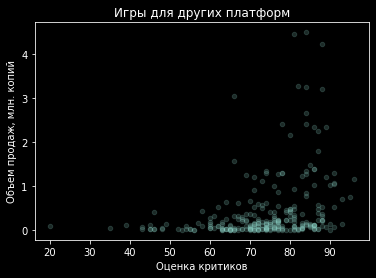

In [ ]:
# scatterplot for critic_score and sum_sales

platform_score.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=.2)

plt.title('Игры для других платформ')
plt.ylabel('Объем продаж, млн. копий')
plt.xlabel('Оценка критиков');

In [ ]:
# correlation coefficient

platform_score['sum_sales'].corr(platform_score['critic_score']) 

0.30324302098520883

Диаграмма иллюстрирует определенную зависимость объема продаж от отзывов критиков. Пользователи в основном покупают игры с оценкой критиков больше 70. Коэффициент корреляции также подтверждает наличии связи этих параметров. Зависимость для PS4 отслеживается примерно также.

Построим диаграмму рассеяния и посчитаем корреляцию между оценками пользователей и продажами.

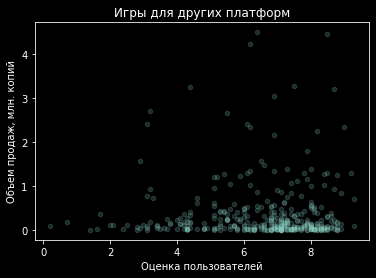

In [ ]:
# scatterplot for user_score and sum_sales

platform_score.plot(x='user_score', y='sum_sales', kind='scatter', alpha=.2)

plt.title('Игры для других платформ')
plt.ylabel('Объем продаж, млн. копий')
plt.xlabel('Оценка пользователей');

In [ ]:
# correlation coefficient

platform_score['user_score'].corr(platform_score['sum_sales']) 

0.017521130656321507

Ни диаграмма, ни коэффициент корреляции не показывает какой-либо зависимости. Продажи, в общем случае, не зависят от оценки пользователей для платформы. Но большинство игр покупается с оценкой пользователей от 6 до 8.5. Зависимость для игр у PS4 представлена с такими же показателями.

В общем случае, пользователи ориентируются на оценки критиков перед покупкой игр. Отзывы самих игроков не влияют на продажи игр.

### Жанр игры

Посмотрим на общее распределение игр по жанрам. Выполним группировку игр за актуальный период по жанрам. Посчитаем, сколько проданных игр представлено для каждого жанра, а также их общие продажи.

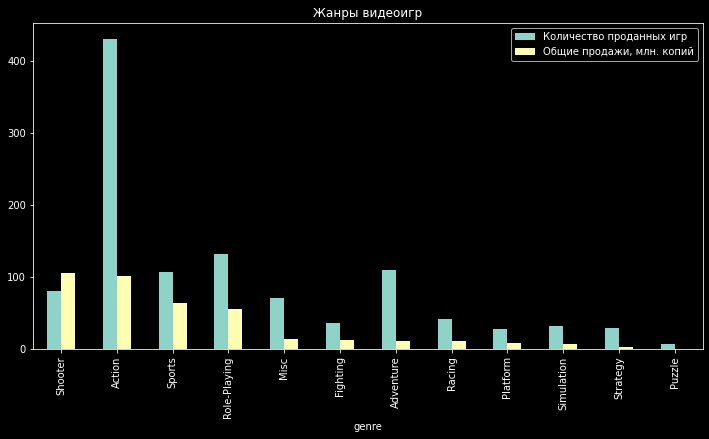

In [ ]:
# plot of grouped games with for genre
ax = (games_actual.groupby('genre').
    agg({'name': 'count', 'sum_sales': 'sum'}).
    sort_values(by='sum_sales', ascending=False).
    plot(kind='bar', figsize=(12,6)))

ax.legend(['Количество проданных игр', 'Общие продажи, млн. копий'])
plt.title('Жанры видеоигр');

Построим диаграммы размаха для анализа значений по жанрам.

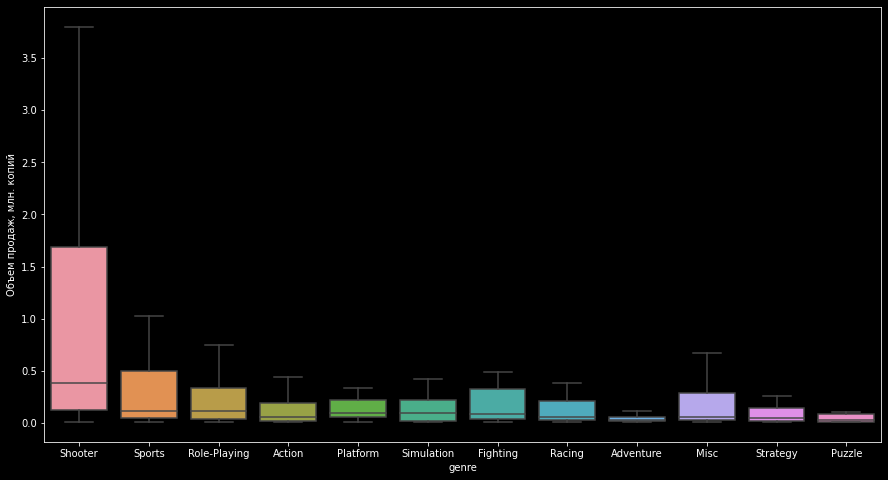

In [ ]:
# boxplot for games by genre
plt.figure(figsize=(15,8))

sns.boxplot(x="genre", y="sum_sales", data=games_actual, showfliers=False)

plt.ylabel('Объем продаж, млн. копий');

Составим рейтинг самых популярных игр у пользователей. Выделяются жанры с высокими продажами:
1. Action. Сущность экшенов отражает их название – в переводе с английского оно означает «действие», и здесь игрок находится в самом центре действия и управляет им. Обычно в экшенах очень легко приступить к игре, поэтому они до сих пор остаются самыми популярными видеоиграми. Спрос рождает предложение, поэтому этот жанр также популярен и у разработчиков. Количество разнообразных игр данного жанра представлено очень широко в данных. Число таких игр в 3 раза больше ближайшего конкурента жанра Role-Playing. Небольшой размах значений говорит о скромных продажах отдельных игр, но разнообразие и огромный ассортимент внутри жанра дает такой высокий объем продаж - более 100 млн. копий. 
2. Shooter. Шутеры позволяют игрокам использовать в своих действиях оружие, обычно с целью уничтожить врагов или противоборствующих игроков. По своему характеру они очень похожи на экшн, отсюда и высокая популярность. Объем продаж - более 100 млн. копий. Диаграмма размаха и дисперсия также самые большие у этого жанра, что говорит о большом числе отдельных игр с высокими продажами. Шутер безоговорочный лидер и наиболее успешный жанр.
3. Role-Playing. Ролевые игры, или RPG – второй по количеству представленных игр. Этот жанр наиболее похож на фэнтези, поэтому игры находятся в тренде и так широко распространены. Объем продаж - более 50 млн. копий. По размаху значений продаж жанр находится на третьем месте после Sports.
4. Sports. Как и следует из названия, симулируют различные виды спорта. Симуляция различных командных спортивных игр – один из старейших игровых жанров. Также одни из наиболее популярных игр этой категории – гоночные симуляторы. Объем продаж - более 60 млн. копий. Диаграмма размаха и дисперсия большие у этого жанра, что говорит о большом числе отдельных игр с высокими продажами, уступая лишь шутерам.
5. Остальные жанры представлены с низкими показателями по общим продажам (в среднем менее 20 млн. копий). Отметим жанр Adventure, игры которого находятся на 3м месте по количеству, но продажи отдельных игр очень низкие. Жанр Puzzle имеет относительно самые низкие продажи. Это жанр головоломок таких, как Тетрис и Angry Birds, который больше популярен на планшетах или смартфонах.

### Вывод

Подведем итоги исследования на этом этапе. Отметим следующие закономерности и результаты:
- Полученные данные содержат проданные игры за период с 1980 по 2016 год. Глобальные продажи игр имели тренд роста до 2008 года, затем показатели продаж планомерно падали по настоящее время. В исследовании не важны данные за все периоды, был определен актуальный период (с 2015 по 2016 год), для определения актуальной ситуации на современном рынке.
- PS4, XOne и 3DS - это наиболее потенциально прибыльные платформы за актуальный период. PS4 - лидер по глобальным продажам, но у XOne есть определенный потенциал по числу игр с высокими продажами.
- 9 лет - это характерный средний срок, за который появляются новые и исчезают старые платформы.
- В общем случае, пользователи ориентируются на оценки критиков перед покупкой игр. Отзывы самих игроков не влияют на продажи.
- Отдельные игры жанров Shooter и Sports самые прибыльные. 

Полученные результаты дают определение потенциально самой прибыльной игры. Видеоигра должна быть выпущена для консоли PS4 или XOne, жанр Shooter или Sport, оценка критиков от 70, оценка пользователей от 6. Жанр Sport был добавлен для полноты сведений ввиду тренда падения спроса, абсолютные продажи и число игр похожи на Shooter.

## Портрет пользователя региона

В полученных данных представлены продажи игр для основных регионов рынка - Северная Америка, Европа, Япония. Выполним расчет, просуммируем продажи за каждый год в регионах.

In [ ]:
# gruoping sales with year by regions
regions_sum = games_actual.pivot_table(index='year_of_release',
                                       values=['eu_sales', 'na_sales', 'jp_sales', 'other_sales'],
                                       aggfunc='sum',margins=True)

#columns order
regions_sum = regions_sum[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
regions_sum

,na_sales,eu_sales,jp_sales,other_sales
year_of_release,,,,
2015,106.86,96.72,34.09,30.31
2016,44.93,51.22,19.31,14.48
All,151.79,147.94,53.40,44.79


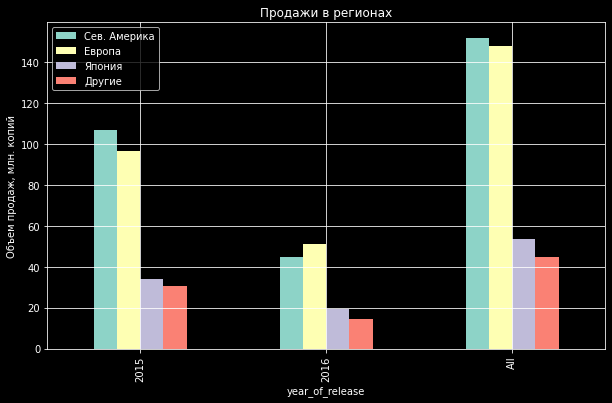

In [ ]:
# barplot for sales by regions 
ax = regions_sum.plot(kind='bar', figsize=(10,6), grid=True)
ax.legend(['Сев. Америка', 'Европа', 'Япония', 'Другие'])
plt.title('Продажи в регионах')
plt.ylabel('Объем продаж, млн. копий');

In [ ]:
regions_sum

,na_sales,eu_sales,jp_sales,other_sales
year_of_release,,,,
2015,106.86,96.72,34.09,30.31
2016,44.93,51.22,19.31,14.48
All,151.79,147.94,53.40,44.79


Действительно основные регионы рынка определены корректно. Сумма всех продаж видеоигр за актуальный период составляет около 398 млн. копий, из них в других регионах было продано только 11% от этой суммы. Лидеры рынка - Сев. Америка и Европа, их доля 75%.

Составим портрет пользователя каждого региона. Определим для них самые популярные платформы и самые популярные жанры. Выясним, влияет ли рейтинг ESRB на продажи.

### Самые популярные платформы 

Отфильтруем общие данные, возьмем продажи игр только для основных регионов за актуальный период. Создадим три датасета для определения пятерки популярных платформ каждого региона, затем объединим эти данные для построения общей диаграммы.

In [ ]:
# grouping of top platforms with sales by regions
platform_eu = games_actual.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()
platform_na = games_actual.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()
platform_jp = games_actual.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

# merge top platforms0
platform_region = platform_eu.merge(platform_na, how='outer')
platform_region = platform_region.merge(platform_jp, how='outer')

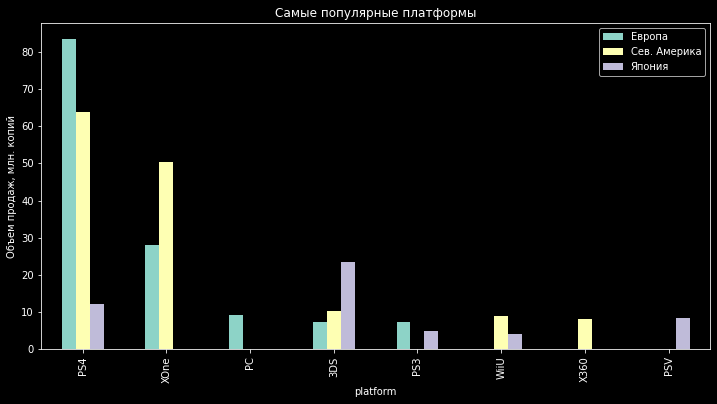

In [ ]:
# barplot for top platforms by regions 
ax = platform_region.plot(kind='bar', x='platform', figsize=(12,6))

ax.legend(['Европа', 'Сев. Америка', 'Япония'])
plt.title('Самые популярные платформы')
plt.ylabel('Объем продаж, млн. копий');

Рассмотрим топ-5 популярных платформ подробнее:

- Платформа PS4 самая популярная в Европе и Сев. Америке, 3DS в Японии. Продажи игр для самой популярной платформы в Европе составляют 82 млн.копий, в Сев. Америке на 25% меньше, в Японии это значение в 4 раза меньше.
- Второе место занимает платформа XOne в Сев. Америке и в Европе, PS4 в Японии. Продажи игр для второго места среди популярных платформ в Сев. Америке составляют 50 млн.копий, в Европе на 40% меньше, в Японии это значение в 4 раза меньше. Разница между лидером для Сев. Америки 20%, для Европы 65%, для Японии эта разница составляет 45%.
- Третье место занимает платформа 3DS в Сев. Америке, PC в Европе, PSV в Японии. Продажи игр для третьего места среди популярных платформ у всех регионов примерно одинаковая от 8 до 10 млн. копий. Разница между лидером для Сев. Америки 85%, для Европы 90% и Японии эта разница составляет 65%.
- Остальные платформы имеют похожие значения продаж - в Европе по 7 млн. копий, в Сев. Америке по 8 млн. копий, в Японии по 4 млн.копий. Трудно что-то выделить.

Пользователи Сев. Америки и Европы предпочитают игры для PS4, следом идет XOne. Лидеры продаж в Японии - игры для 3DS, следом PS4, XOne не популярна.

### Самые популярные жанры

Определим также пятерку популярных жанров каждого региона. Объединим эти данные для построения общей диаграммы.

In [ ]:
# grouping of top platforms with sales by regions
genre_eu = games_actual.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()
genre_na = games_actual.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()
genre_jp = games_actual.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

# merge top platforms
genre_region = genre_eu.merge(genre_na, how='outer')
genre_region = genre_region.merge(genre_jp, how='outer')
genre_region

,genre,eu_sales,na_sales,jp_sales
0,Shooter,40.28,48.18,3.79
1,Action,34.82,33.68,23.05
2,Sports,27.82,26.31,NaN
3,Role-Playing,17.21,19.82,13.41
4,Racing,6.52,NaN,NaN
5,Misc,NaN,5.58,3.19
6,Adventure,NaN,NaN,2.22


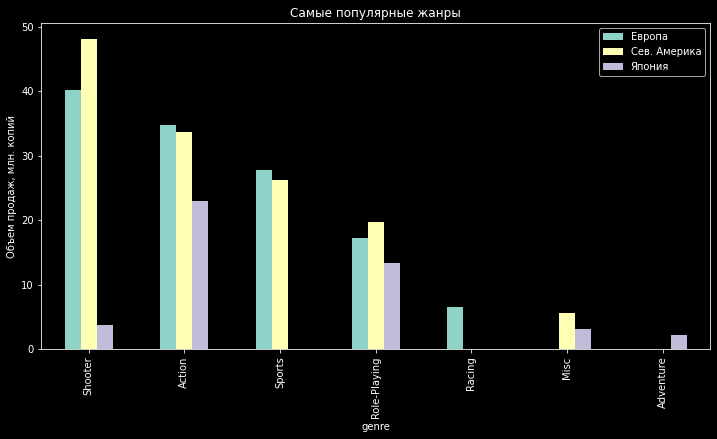

In [ ]:
# barplot for top platforms by regions 
ax = genre_region.plot(kind='bar', x='genre', figsize=(12,6))

ax.legend(['Европа', 'Сев. Америка', 'Япония'])
plt.title('Самые популярные жанры')
plt.ylabel('Объем продаж, млн. копий');

Предпочтение жанров для видеоигр у пользователей Сев. Америки и Европы очень похожи. Пользователи Японии имеют некоторые особенности. Рассмотрим топ-5 популярных жанров подробнее:
- Шутер лидирует по продажам в Европе и Сев. Америке. Особенно это заметно для покупателей в Сев. Америке, объем продаж там около 48 млн. копий, разница с экшн составляет 30%, эта же разница в Европе всего 14%. В Японии этот жанр заметно отстает - третье место.
- Экшн популярен во всех основных регионах. Второе место по продажам в Сев.Америке и в Европе. Большинство Японцев покупают игры именно этого жанра, объем продаж - 23 млн. копий, разница с Role-Playing составляет 40%.
- Спортивные симуляторы на третьем месте по полярности в Сев. Америке и Европе, разница с шутером 45% и 30% соответственно. Игры данного жанра не популярны в Японии.
- Role-Playing идут следом. Этот жанр наиболее популярен в Японии, он занимает здесь второе место. В Сев. Америке и Европе только четвертое, отставание от лидера в этих странах около 60%.
- Остальные жанры имеют похожие значения продаж - от 2 до 6 млн.копий. Трудно что-то выделить.

Пользователи Сев. Америки больше всего предпочитают шутеры. Европейцы тоже, в общем случае, покупают игры этого жанра. Экшн особенно популярен в Японии, в Сев. Америке и в Европе он на втором месте. Спортивные симуляторы на третьем месте по популярности в Сев. Америке и Европе, но в Японии его даже нет в топ-5. Индивидуальность пользователей обусловлены национальными и культурными особенностями их регионов. Покупатели в Сев. Америке и в Европе похожи, а в Японии отличаются.

### Влияние рейтинга ESRB

Мы уже установили, что рейтинг ESRB указан не для всех игр в общих данных. Найдем долю таких случаев в выборке за актуальный период.

In [ ]:
share_esrb = games_actual['rating'].isna().mean()
print(f'Доля игр без рейтинга составляет {share_esrb:.0%}.')

Доля игр без рейтинга составляет 46%.


Пропуски рейтинга имеются у довольно большого числа игр. Отметим эти позиции как "NA" - сокращение от "not applicable", с англ. неприменимо.

In [ ]:
games_actual['rating'] = games_actual['rating'].fillna('NA')

Выясним, как влияет рейтинг ESRB на продажи в отдельном регионе. Сгруппируем данные по рейтингу и построим общую диаграмму.

In [ ]:
# grouping of top platforms with sales by regions
esrb = games_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').reset_index()
esrb = esrb.sort_values(by='na_sales',ascending=False)

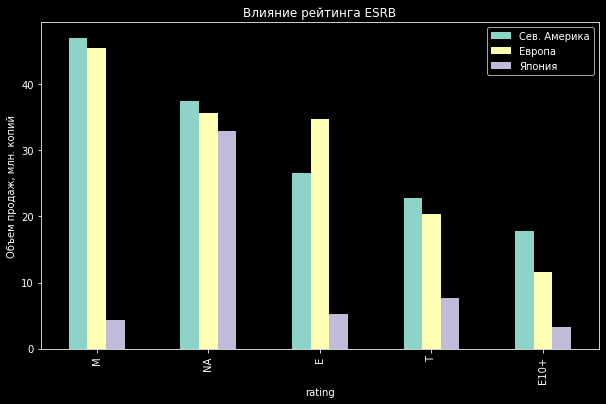

In [ ]:
# barplot for top platforms by regions 
ax = esrb.plot(kind='bar', x='rating', figsize=(10,6))

ax.legend(['Сев. Америка', 'Европа', 'Япония'])
plt.title('Влияние рейтинга ESRB')
plt.ylabel('Объем продаж, млн. копий');

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Игры с таким рейтингом наиболее популярны у покупателей из Сев. Америки и Европы. Игры с рейтингом М находятся лишь на третьем месте по продажам в Японии.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Игры рассчитаны на широкую возрастную аудиторию, отсюда и такая большая популярность. Второе место по продажам во всех регионах.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Игры с таким рейтингом самые популярные в Японии, для остальных регионах только третье место по продажам.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Игры с рейтингом Е имеют самые низкие продажи в регионах.

Пользователи Сев. Америки и Европы больше всего предпочитают игры рейтинга М и Е, а в Японии - рейтинга Т и Е.

Продажи игр без рейтинга очень высокие. Они безусловные лидеры в Японии, продажи больше в 4 раза, чем у игр с рейтингом Т. В Сев. Америке и Европе такие позиции занимают второе место по абсолютным продажам.

Построим диаграмму размаха, чтобы оценить влияние ESRB на глобальные продажи.

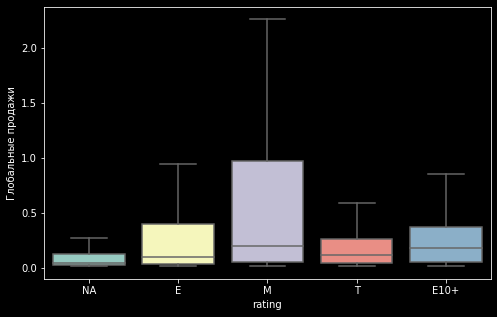

In [ ]:
# boxplot for rating and sum_sales
plt.figure(figsize=(8,5))
sns.boxplot(x="rating", y="sum_sales", data=games_actual, showfliers=False)
plt.ylabel('Глобальные продажи');

Пользователи во всех регионах, в общем случае, особенно предпочитают игры рейтинга М. Вероятно, что это обусловлено популярностью таких жанров как Shooter, где в определенном количестве присутствует насилие и возрастные ограничения. Рейтинг Е на втором месте.

Отдельные игры без рейтинга ESRB самые непопулярные. Диаграмма размаха для них принимает минимальные значения по продажам. Возможно пропуски обусловлены низкой известностью таких игр в Сев. Америке и Европе, потому что все популярные игры проходят проверку и получают рейтинг ESRB - это важное условие у всех крупных центров продаж. В Японии же находятся региональные агентства по определению рейтинга и местные центры продаж не требуют ESRB. Можно сделать вывод, что рейтинг ESRB хотя и имеет региональный характер, но в общем случае, он отсутствует у непопулярных игр.

### Вывод

Платформа PS4, в общем случае, самая популярная платформа у основных регионов. Европейцы предпочитают ее другим консолям, даже больше чем американцы. Отрыв продаж игр в Европе для PS4 составляет целых 65% от XOne, у Сев. Америки эта разница всего лишь 20%. Японцы предпочитают игры на более старую 3DS, PS4 уступает ей здесь 45% по продажам.

Пользователи Сев. Америки и Европы больше всего предпочитают шутеры. Экшн особенно популярен в Японии. Индивидуальность пользователей обусловлены национальными и культурными особенностями своих регионов. Покупатели в Сев. Америке и в Европе похожи, а в Японии отличаются.

Пользователи Сев. Америки и Европы больше всего предпочитают игры рейтинга М, в Японии самые высокие продажи игр с рейтингом Т. На втором месте среди всех регионов - игры с рейтингом Е. Отдельные игры без рейтинга ESRB самые непопулярные в основных регионах. Рейтинг ESRB обязательное условие для продажи в Сев. Америке и Европе.

## Проверка гипотез

### Рейтинги платформ Xbox One и PC

Проверим гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Создадим датасеты для анализа оценок каждой из платформ.

In [ ]:
# dataset for Xbox user_score
xbox_score = games_actual.query('(platform=="XOne")&(user_score>0)')['user_score'].copy()
xbox_score = xbox_score.reset_index()
xbox_score = xbox_score.drop(columns = ['index'],axis = 1)
display(xbox_score.head())
print('Количество строк', xbox_score.shape[0])

,user_score
0,6.4
1,6.2
2,7.5
3,4.4
4,5.5


Количество строк 121


In [ ]:
# dataset for Xbox user_score
pc_score = games_actual.query('(platform=="PC")&(user_score>0)')['user_score'].copy()
pc_score = pc_score.reset_index()
pc_score = pc_score.drop(columns = ['index'],axis = 1)
display(pc_score.head())
print('Количество строк', pc_score.shape[0])

,user_score
0,5.4
1,7.9
2,9.3
3,8.0
4,6.8


Количество строк 84


Сформулируем нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза будет звучать противоположно: Средние пользовательские рейтинги платформ Xbox One и PC различаются. В исследовании необходимо доказать, что различия в выборке не случайны.

Применим специальный метод `scipy.stats.ttest_ind` для проверки гипотезы о равенстве среднего двух совокупностей, он выдает значение `p-value`. Выборки по платформам имеют разный размер, найдем дисперсию для каждой. Датасеты — не вся совокупность, а выборка из неё, вместо дисперсии считают её оценку по имеющейся выборке, для этого в методе `var()` указываем параметр `ddof=1`.

In [ ]:
pc_score.var(ddof=1)

user_score    3.110951
dtype: float64

In [ ]:
xbox_score.var(ddof=1)

user_score    2.125792
dtype: float64

Результат вычислений - дисперсии выборок разные. Выполним проверку нулевой гипотезы пользовательской оценки для совокупностей по платформам:
- если выборки разного размера и дисперсии у этих совокупностей разные, то укажем `equal_var = False` при вызове метода `scipy.stats.ttest_ind()`.
- критический уровень статистической значимости примем 5%, как `alpha = .05`. Такое значение является стандартным, у нас отсутствуют какие-либо условия, чтобы его скорректировать. 
- если `p-value` окажется меньше альфа - отвергнем гипотезу.

In [ ]:
# t-test for Xbox and PC

alpha = 0.05

results = st.ttest_ind(
    xbox_score, 
    pc_score,
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  [0.29463089]
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза принимается, отсюда следует, что cредние пользовательские рейтинги платформ Xbox One не отличаются от средних оценок для PC. Проверим этот результат, посчитаем среднюю оценку для каждой платформы.

In [ ]:
# Xbox mean
xbox_score.mean()

user_score    6.542149
dtype: float64

In [ ]:
# PC mean
pc_score.mean()

user_score    6.296429
dtype: float64

Действительно, средняя оценка видеоигр для платформы Xbox One почти не отличаются от средней оценки для PC, разница всего 4%.

Полученные выборки не смогли опровергнуть гипотезу, что средняя оценка видеоигр для платформы Xbox One и PC не различаются.

### Рейтинги жанров Action и Sports

Проверим гипотезу - средние пользовательские рейтинги жанров Action и Sports разные. Создадим датасеты для анализа оценок каждой из платформ.

In [ ]:
# dataset for Action user_score
action_score = games_actual.query('(genre=="Action")&(user_score>0)')['user_score'].copy()
action_score = action_score.reset_index()
action_score = action_score.drop(columns = ['index'],axis = 1)
display(action_score.head())
print('Количество строк', action_score.shape[0])

,user_score
0,8.1
1,7.6
2,8.2
3,6.8
4,8.6


Количество строк 193


In [ ]:
# dataset for Sport user_score
sport_score = games_actual.query('(genre=="Sports")&(user_score>0)')['user_score'].copy()
sport_score = sport_score.reset_index()
sport_score = sport_score.drop(columns = ['index'],axis = 1)
display(sport_score.head())
print('Количество строк', sport_score.shape[0])

,user_score
0,4.3
1,5.0
2,6.7
3,4.4
4,5.9


Количество строк 82


Сформулируем нулевую гипотезу: средние пользовательские рейтинги видеоигр жанров Action и Sports одинаковые. Альтернативная гипотеза будет звучать противоположно: средние пользовательские рейтинги видеоигр жанров Action и Sports различаются. В исследовании необходимо доказать, что различия в выборке не случайны.

Применим специальный метод `scipy.stats.ttest_ind` для проверки гипотезы о равенстве среднего двух совокупностей, он выдает значение `p-value`. Выборки по жанрам имеют разный размер, найдем дисперсию для каждого жанра. Датасеты — не вся совокупность, а выборка из неё, вместо дисперсии считают её оценку по имеющейся выборке, для этого в методе `var()` указываем параметр `ddof=1`.

In [ ]:
# variance for Action
action_score.var(ddof=1)

user_score    1.813056
dtype: float64

In [ ]:
# variance for Sports
sport_score.var(ddof=1)

user_score    3.872468
dtype: float64

Результат вычислений - дисперсии выборок разные. Выполним проверку нулевой гипотезы пользовательской оценки для совокупностей по жанрам:
- если выборки разного размера и дисперсии у этих совокупностей разные, то укажем `equal_var = False` при вызове метода `scipy.stats.ttest_ind()`.
- критический уровень статистической значимости примем 5%, как `alpha = .05`. Такое значение является стандартным, у нас отсутствуют какие-либо условия, чтобы его скорректировать. 
- если `p-value` окажется меньше альфа - отвергнем гипотезу.

In [ ]:
# t-test for Xbox and PC

alpha = 0.05

results = st.ttest_ind(
    sport_score, 
    action_score,
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  [5.9716355e-10]
Отвергаем нулевую гипотезу


In [ ]:
# Action mean
action_score.mean()

user_score    6.80829
dtype: float64

In [ ]:
# Sports mean
sport_score.mean()

user_score    5.19878
dtype: float64

Можем убедиться, что p-значение принимает экстремально малое значение. Критерий проверки альфа можно выбрать намного меньше и все равно нулевая гипотеза будет отвергнута. Действительно средняя оценка игр жанра Action больше, чем у Sports на 24%.

Полученные выборки подтверждают гипотезу, что средние пользовательские рейтинги видеоигр жанров Action и Sports различаются.

### Вывод

Мы проверили гипотезы при помощи статистического теста с пороговым значением альфа 0.05%:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Первую гипотезу не получилось отвергнуть. Полученное значение p-value говорит о том, что вероятность случайно получить такое различие между оценками пользователей почти 30%, хотя и платформы совершенно разные. Это явно слишком большая вероятность случайности, чтобы делать вывод о значимом различии между рейтингом Xbox One и PC.

Вторая гипотезу не получилось отвергнуть. Полученное значение p-value говорит о том, что вероятность случайно получить такое различие рейтингов жанров Action и Sports почти 0.001%. Средняя оценка статистически значимо отличается в зависимости от жанра. Исследование полученной выборки видеоигр с большой вероятностью говорит в пользу гипотезы.



## Вывод

Полученные данные содержат проданные игры в количестве 16715 шт. за период с 1980 по 2016 год. На этапе предобработки были исправлены ошибки. Общие данные были приведены в форму более удобную для анализа:
- Названия столбцов записаны с помощью нижнего регистра.
- Удалили пропуски в столбцах `'name', 'genre', 'year_of_release'`. Исходные данные сократились на 1%.
- Тип данных для колонок `'user_score' и 'year_of_release'` скорректирован.
- Был добавлен столбец с указанием суммарных продаж во всех регионах.

Ошибки в данных скорее всего появились по техническим причинам при переносе данных. Пропуски в столбцах `'critic_score', 'user_score', 'rating'` возможно связаны с низкой популярностью некоторых игр.

Глобальные продажи игр имели тренд роста до 2008 года, затем показатели продаж планомерно падали по настоящее время. Ситуация на современном рынке не очень позитивная, спрос на игры падает. Правильный выбор потенциально прибыльной игры для рекламы особенно критичен. В исследовании не важны все данные, был определен актуальный период для отслеживания актуальной ситуации на современном рынке, чтобы более точно построить прогноз на 2017 год. Анализ был проведен для выборки с информацией о 1108 проданных игр за период с 2015 по 2016 год.

Лидеры глобальных продаж - Сев. Америка и Европа, их доля составляет 75% от мирового рынка. Япония занимает лишь 14% глобальных продаж и ее особенности внутреннего рынка специфичны, иногда резко отличаются от общемировых трендов. Это обусловлено национальными и культурными отличиями японских пользователей. Следует ориентироваться в рекламных компаниях на лидирующие регионы.

PS4 и XOne - это наиболее потенциально прибыльные платформы за актуальный период. Видеоигры для PS4 лидируют по глобальным продажам, но у XOne имеется большой потенциал по числу игр с выскоми продажами. 

Отдельные игры жанров Shooter и Sports самые прибыльные. У них сравнительно высокие продажи и меньший ассортимент, что упрощает выбор для рекламы и конкуренцию внутри жанра, чего не скажешь про Action. 

Статистический анализ совокупности данных проверил выдвинутые гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотезу не получилось отвергнуть. Статистический тест определил, что имеется слишком большая вероятность случайности, почти 30%, чтобы делать вывод о значимом различии рассматриваемых платформ. Полученные средние также говорят в пользу гипотезы: средняя оценка видеоигр для платформы Xbox One почти не отличаются от средней оценки для PC, разница всего около 4%.

2. Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотезу не получилось отвергнуть. Статистический тест определил, что средняя оценка значимо отличается (вероятность 99,9%) в зависимости от жанра Action или Sports. Полученные средние также говорят в пользу гипотезы: рейтинг игр жанра Action больше, чем у Sports на 24%. Фанатам жанра Sports труднее угодить, а любители жанра Action более лояльны в своих оценках.

Несмотря на пользовательские рейтинги, исследование показало, что пользователи ориентируются на оценки критиков перед покупкой игр. Отзывы самих игроков не влияют на продажи. Наличие рейтинга ESRB - это обязательное условие для продажи топовых игр в Сев. Америке и Европе. 

Чтобы обеспечить большую вероятностью успеха, в рекламной компании потенциально популярного продукта (видеоигры) необходимо учесть выявленные закономерности: 
- более точный прогноз следует строить на основе анализа актуального периода продаж, т.е. с соблюдением условия "жизни" популярных платформ (сейчас длительность составляет 9 лет) и с условием отражения современной динамики продаж;
- ориентироваться на рынки Сев. Америки и Европы;
- выбрать видеоигру для платформы PS4 или XOne;
- жанр Shooter или Sports;
- обязательно наличие возрастного рейтинга ESRB, очень популярны игры с рейтингом "М" или "Е";
- рейтинг критиков больше 70.